<a href="https://colab.research.google.com/github/abhi9rocks/DL/blob/master/Copy_of_Mongo_Product_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pymongo
import requests as rt
from IPython.display import Image, display,clear_output
import time
import base64

from urllib.request import urlopen
import cv2
import numpy as np
from urllib.error import HTTPError
from PIL.Image import fromarray as fa

In [2]:
def load_image_from_link(url):
    req = urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
def resize_image(image: np.ndarray, target_shape):
    height, width, _ = image.shape
    target_height = target_shape[0]
    target_width = target_shape[1]

    if width / height >= target_width / target_height:
        scale = target_width / width
    else:
        scale = target_height / height
    # Resize
    if scale != 1:
        width = int(round(width * scale))
        height = int(round(height * scale))
        resized_image = cv2.resize(image, (width, height))
    else:
        resized_image = np.copy(image)
    # Pad
    dw = target_width - width
    dh = target_height - height
    if not (dw == 0 and dh == 0):
        dw = dw // 2
        dh = dh // 2
        padded_image = np.full(
            (target_height, target_width, 3), 255, dtype=np.uint8
        )
        padded_image[dh : height + dh, dw : width + dw, :] = resized_image
    else:
        padded_image = resized_image
    return padded_image

In [3]:
base64_string ="bW9uZ29kYjovL21vaGl0Om1vaGl0QXRHcnJvb21AMTQyLjkzLjIxMi4xMzYvc2NyYXBlZERhdGE="
base64_bytes = base64_string.encode("ascii")
sample_string_bytes = base64.b64decode(base64_bytes)
sample_string = sample_string_bytes.decode("ascii")
jr = pymongo.MongoClient(sample_string).get_database('scrapedData').data
d = {}
for i in jr.find({}, {"product_category":1, "_id":0}):
    key = i["product_category"]
    if key not in d:d[key]=1
    else:d[key]+=1
categories = sorted(d.keys())
for idx,i in enumerate(ca+96tegories):
    print(str(idx).ljust(4, " "),i.ljust(25, " "), d[i])
choice_indx=int(input("Choose the index that you want to check: -\n"))

0    2-Piece Ethnic Suit       1194
1    2P-Suit Sets              100
2    3-Piece Ethnic Suit       833
3    3P-Suit Sets              45
4    Accessories               345
5    Accessories, Cases & organizers 298
6    Accessories, Fashion      8
7    Accessories, Fashion Accessories 1213
8    Accessories, Jewellery    40
9    Accessories, Travel       180
10   Analog                    2901
11   Analog & Digital          75
12   Anklet                    292
13   Baby Dolls                42
14   Backpacks                 7009
15   Bag Accessories           7
16   Bags                      469
17   Bangle                    855
18   Bangle & Bracelets        241
19   Bath & Shower             14
20   Bellies                   17
21   Belts                     9786
22   Blazers                   2966
23   Blazers & Waistcoats      2096
24   Blouses                   3060
25   Blouses and Dress Material 892
26   Bodysuit                  5
27   Boots                     1173
28   Bott

In [4]:
choice=categories[choice_indx]
records=list(jr.find({'product_category':{'$eq':choice}}))

Product Category:  Waistcoat
Image Number:  41 Total Images: 215
Image checked: 7
Product link: -
https://www.myntra.com/Waistcoat/NEUDIS/NEUDIS-Men-Brown-Checked-Waistcoat/12196504/buy


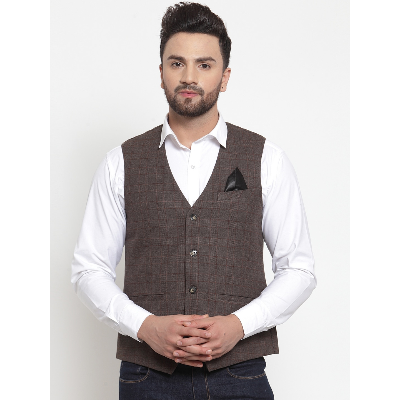

Press Enter for next image or Enter a number to skip images


In [ ]:
counter=0
count = 1
while counter<len(records):
  img_link=records[counter]['primary_image_link']
  product_link=records[counter]['_id']
  print('Product Category: ',choice )
  print('Image Number: ',counter,'Total Images:',len(records))
  print("Image checked:", count)
  count+=1
  print("Product link: -\n"+product_link)
  try:
    img = load_image_from_link(records[counter]['primary_image_link'])
  except HTTPError:
    print("HTTPERROR OCCURED for",records[counter]['primary_image_link'], "\n")
    counter+=1
    continue 
  img = resize_image(img, (400, 400))
  display(fa(img))
  print('Press Enter for next image or Enter a number to skip images')
  time.sleep(2)
  choice2=input()
  if choice2 == '':
    counter+=1
    clear_output()
    continue
  else:
    counter+=int(choice2)
    clear_output()
    continue